<a href="https://colab.research.google.com/github/Um333r/Decision-Trees-Company_Data/blob/master/Decision_Trees_Company_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Trees Assignment**

**Data Set** **-**  Company_Data
1. Import Necessary libraries

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

2. Import Data


In [52]:
company_details = pd.read_csv('/content/Company_Data.csv')
company_details

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


3. Data Understanding

3.1 Initial Analysis :

In [53]:
company_details.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
company_details.shape


(400, 11)

In [54]:
company_details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [55]:
company_details.isna().sum()


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
company_details.describe()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
company_details.dtypes


Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [ ]:
company_details.columns


Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
company_details.ShelveLoc.value_counts()


Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

3.2 Correlation Matrix :


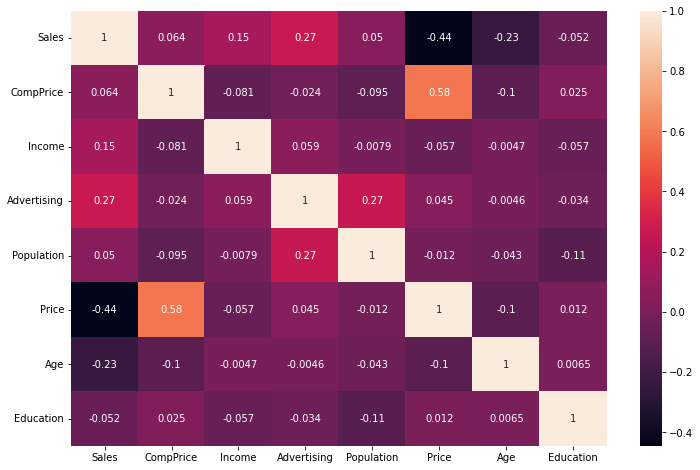

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(company_details.corr(),annot = True)
plt.show()

3.3 Label Encoder :


In [ ]:
from sklearn import preprocessing


In [ ]:
label_encoder = preprocessing.LabelEncoder()
label_encoder

LabelEncoder()

In [ ]:
company_details['ShelveLoc'] = label_encoder.fit_transform(company_details['ShelveLoc'])
company_details['Urban'] = label_encoder.fit_transform(company_details['Urban'])
company_details['US'] = label_encoder.fit_transform(company_details['US'])


In [ ]:
company_details


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


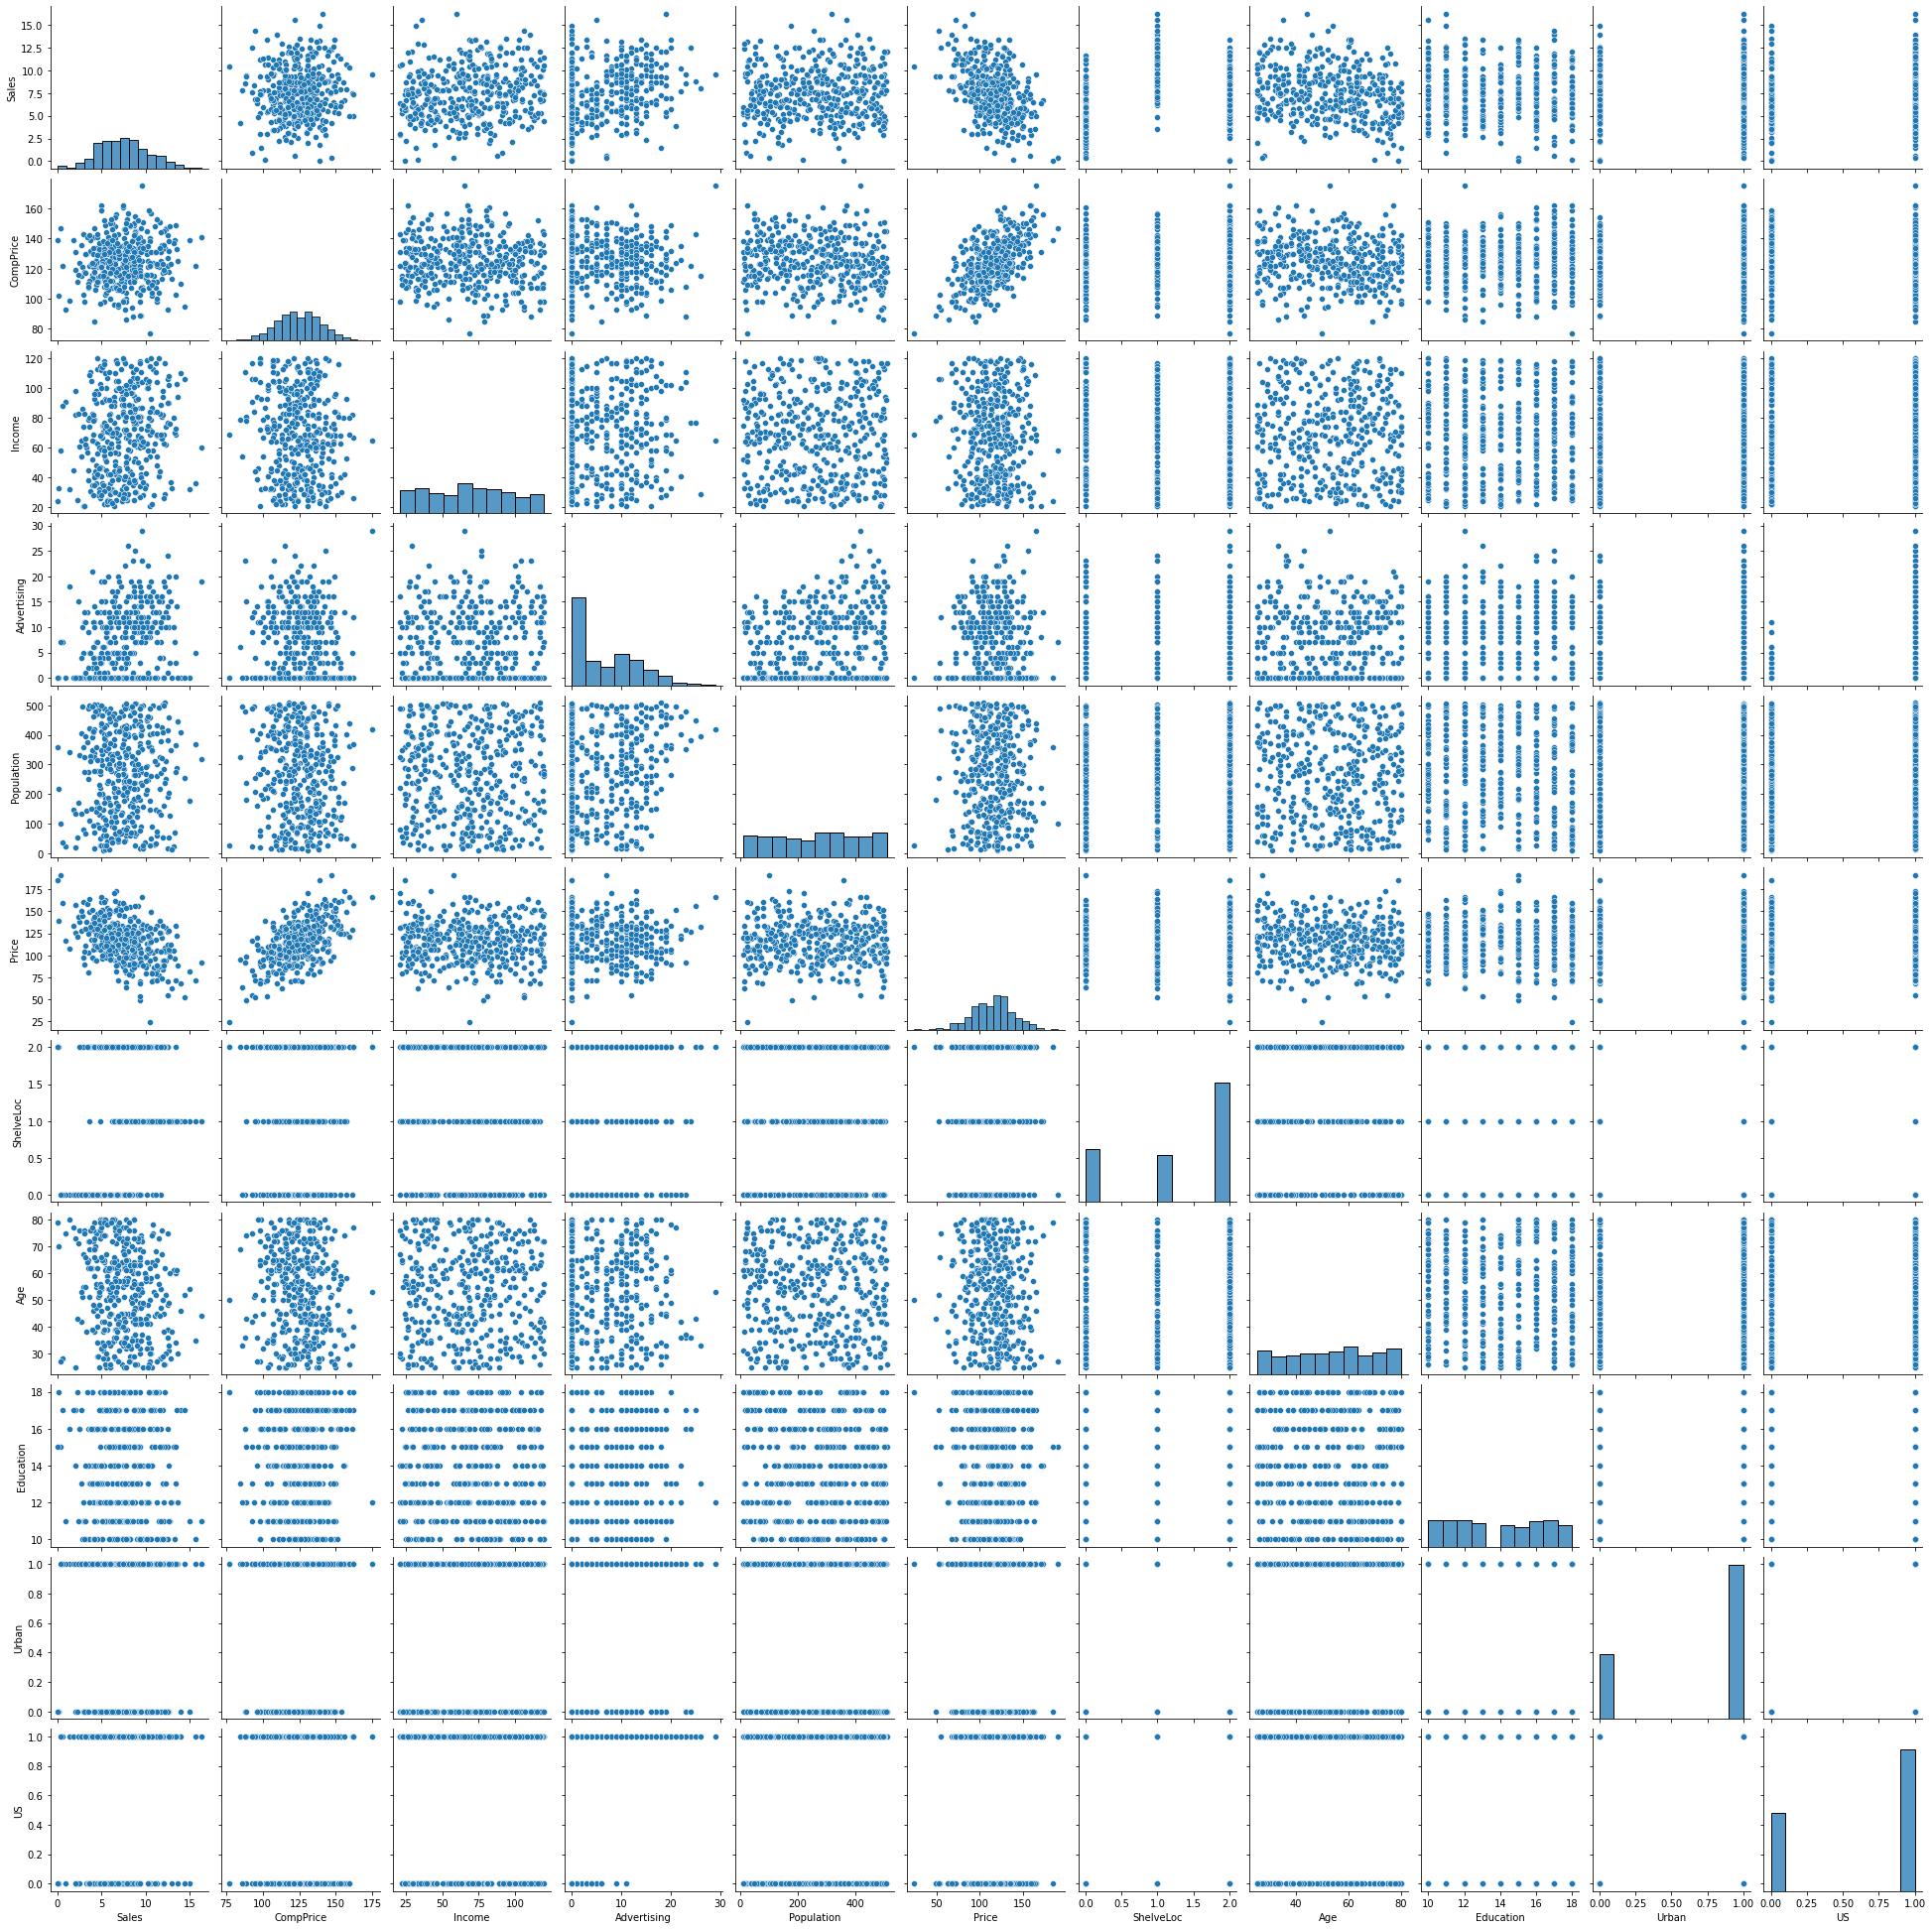

In [ ]:
sns.pairplot(company_details)
plt.show()

4. Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x = company_details.iloc[:,0:6]
y = company_details['ShelveLoc']

In [ ]:
x


,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [ ]:
company_details['ShelveLoc'].unique()


array([0, 1, 2])

In [ ]:
company_details.ShelveLoc.value_counts()


2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [ ]:
list(company_details.columns)


['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 40) 


5. Building Model for Decision Tree Classifier using Entropy Criteria

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

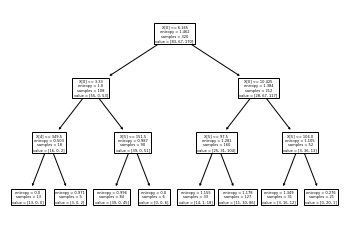

In [ ]:
tree.plot_tree(model);  


In [ ]:
f_n = ['Sales','CompPrice','Income','Advertising','Population','Price']
c_n = ['Bad', 'Good', 'Medium']

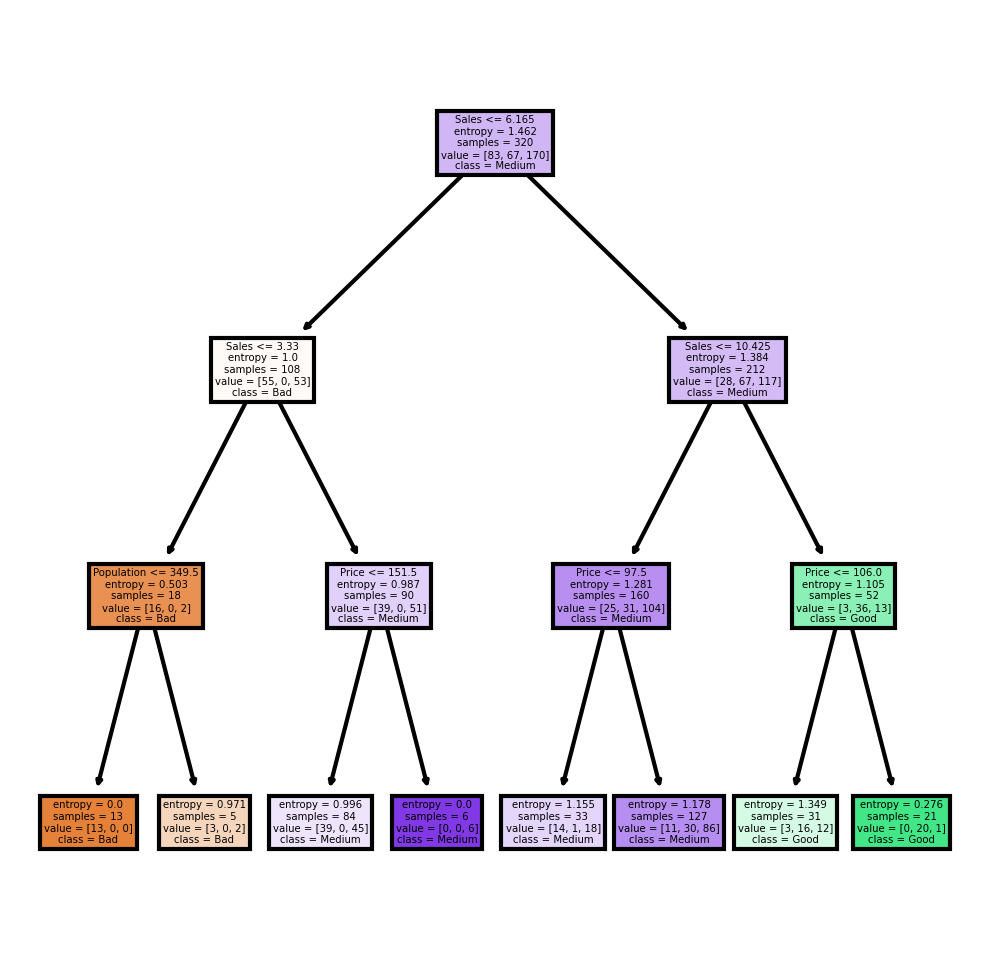

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi = 300)
tree.plot_tree(model,feature_names = f_n,class_names = c_n,filled = True);

5.1 Predicting on Test Data


In [ ]:
pred = model.predict(x_test)                 
pd.Series(pred).value_counts()  

2    63
1    13
0     4
dtype: int64

In [ ]:
pred


array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [ ]:
pd.crosstab(y_test,pred)


col_0,0,1,2
ShelveLoc,,,
0,1,0,12
1,0,8,10
2,3,5,41


In [ ]:
np.mean(pred == y_test) 


0.625

5.2 Feature Importance


In [ ]:
model.feature_importances_ 


array([0.74692591, 0.        , 0.        , 0.        , 0.02920061,
       0.22387348])

In [ ]:
feature_imp = pd.Series(model.feature_importances_,index = f_n).sort_values(ascending = False) 
feature_imp

Sales          0.746926
Price          0.223873
Population     0.029201
CompPrice      0.000000
Income         0.000000
Advertising    0.000000
dtype: float64

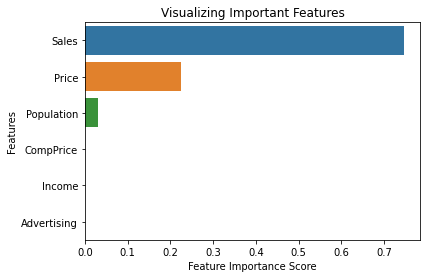

In [ ]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

6. Building Model For Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
model_1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model_1.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

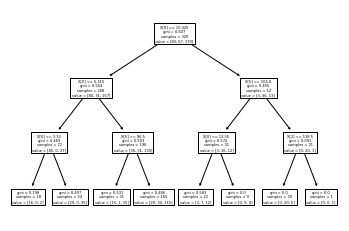

In [ ]:
tree.plot_tree(model_1); 


In [ ]:
f_n = ['Sales','CompPrice','Income','Advertising','Population','Price']
c_n = ['Bad', 'Good', 'Medium']

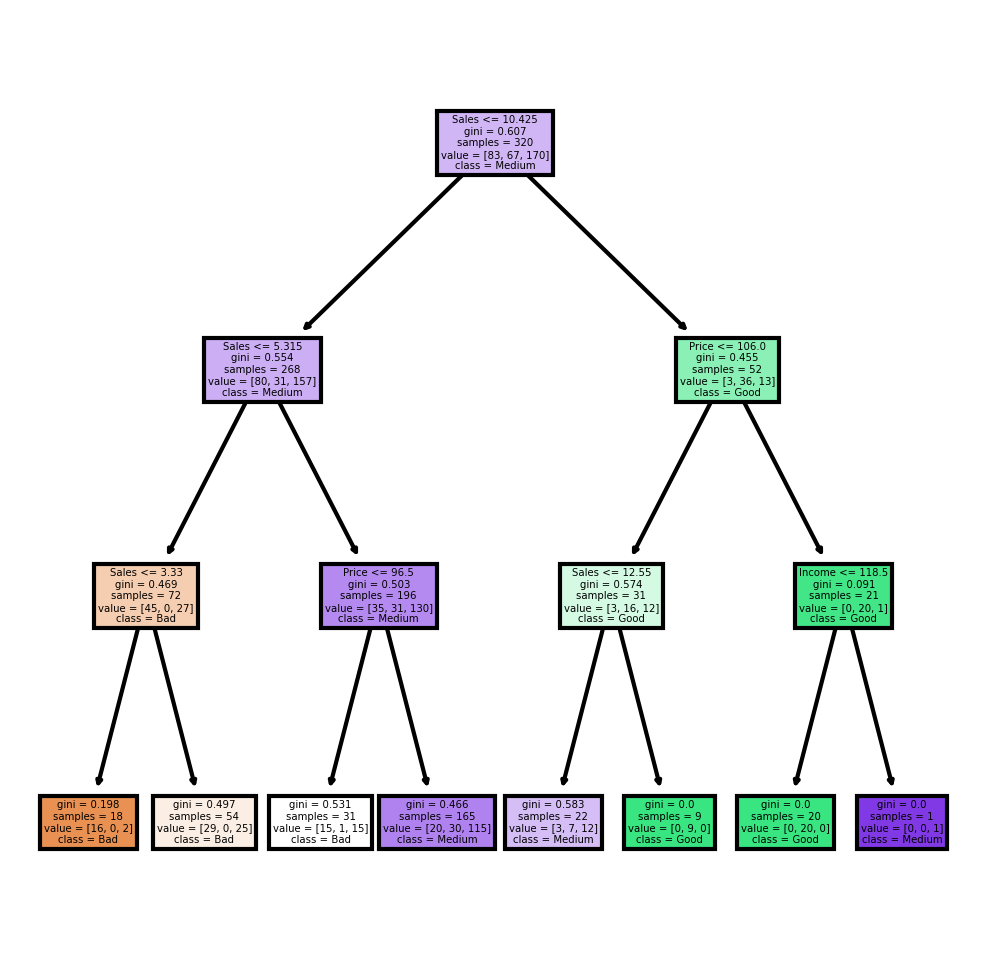

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi = 300)
tree.plot_tree(model_1,feature_names = f_n,class_names = c_n,filled = True);


6.1 Predicting on Test Data


In [ ]:
pred_1 = model_1.predict(x_test)                 
pd.Series(pred_1).value_counts() 

2    42
0    33
1     5
dtype: int64

In [ ]:
pred_1


array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2,
       2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2])

In [43]:
pd.crosstab(y_test,pred_1)


col_0,0,1,2
ShelveLoc,,,
0,8,0,5
1,2,4,12
2,23,1,25


In [ ]:
np.mean(pred_1 == y_test) 


6.2 Feature Importance


In [44]:
model_1.feature_importances_


array([0.80779928, 0.        , 0.03313531, 0.        , 0.        ,
       0.15906541])

In [45]:
feature_imp_1 = pd.Series(model_1.feature_importances_,index = f_n).sort_values(ascending = False) 
feature_imp_1

Sales          0.807799
Price          0.159065
Income         0.033135
CompPrice      0.000000
Advertising    0.000000
Population     0.000000
dtype: float64

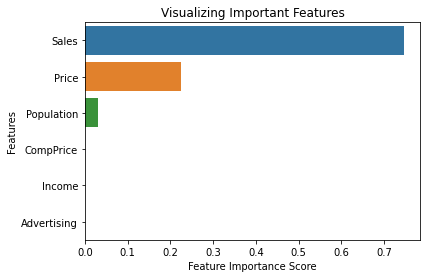

In [46]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

7. Decision Tree Regression


In [47]:
from sklearn.tree import DecisionTreeRegressor 


In [48]:
array = company_details.values
X = array[:,0:6]
y = array[:,3] 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1) 


In [50]:

model_3 = DecisionTreeRegressor()
model_3.fit(X_train, y_train) 

DecisionTreeRegressor()

In [51]:
model_3.score(X_test,y_test) 


0.9894098230386015

**Conclusion :**
Model Accuracy for Entropy Criteria :  0.625

Model Accuracy for Gini Criteria    :  0.462

Model Accuracy for Decision Tree Regression : 0.989
